In [52]:
import numpy as np
from q_lab_toolbox.observables import (
    create_readout_computational_basis,
    computation_basis_labels,
)
import matplotlib.pyplot as plt
from q_lab_toolbox.optimizer import channel_fac
from q_lab_toolbox.physics_defns.initial_states import rho_rand_haar
from q_lab_toolbox.pprint.visualize import plot_ess, compare_ess
from q_lab_toolbox.training_data import measure_rhos

from q_lab_toolbox.unitary_circuits import _HEA_fac, TriangularLayout, unitary_circuit_fac

from q_lab_toolbox.physics_defns.target_systems import DecaySystem
from q_lab_toolbox.channel import evolver_fac
from q_lab_toolbox.optimizer import optimize

from q_lab_toolbox.observables import all_observables

from q_lab_toolbox.training_data import random_rho0s, solve_lindblad_rho0s, mk_training_data, solve_lindblad_rho0

In [53]:
qubits = TriangularLayout(m=1, cutoff=1, distance=0.9)
circuit2 = _HEA_fac(qubits, depth=5, repeats=1)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

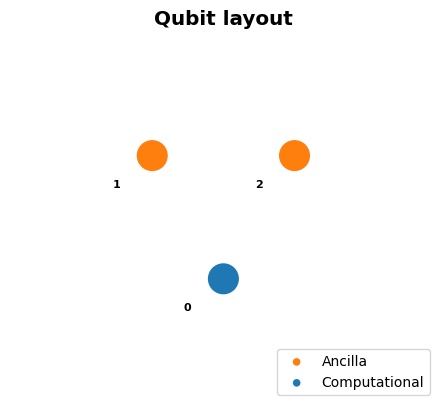

In [54]:
qubits.show_layout()

In [55]:
system = DecaySystem(ryd_interaction=1.8, omegas=(0.5,), m=1, gammas=(0.5,))

rho0s = random_rho0s(m=1, L=10)
rhoss, ts = solve_lindblad_rho0s(rho0s=rho0s, delta_t=0.5, N=3, s=system)
Os = all_observables(m=1)
training_data = mk_training_data(rhoss, Os)

random_rho0s: setting seed=37450


In [56]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

optimizer (optimization indices): setting seed=86223
Iteration: 0 
            Current gradient term: [ 1.82323156e-02  1.38777878e-15  1.38777878e-15  1.42060828e-02
  0.00000000e+00 -1.38777878e-15  1.66647009e-02  0.00000000e+00
  2.77555756e-15 -8.55036150e-04  1.66647009e-02  0.00000000e+00
  0.00000000e+00  3.98565928e-03 -4.43822018e-03 -4.43822018e-03
 -6.34689027e-02  9.21181119e-03  9.21181119e-03  3.39958172e-02
 -6.34689027e-02  9.21181119e-03  9.21181119e-03 -1.49716532e-02
  1.29568212e-02  1.29568212e-02 -2.63534363e-02  1.15064947e-02
  1.15064947e-02 -8.26398602e-03 -2.63534363e-02  1.15064947e-02
  1.15064947e-02  1.11457107e-02  7.13212060e-03  7.13212060e-03
  1.70154799e-02  1.32597451e-02  1.32597451e-02 -7.97626347e-02
  1.70154799e-02  1.32597451e-02  1.32597451e-02  5.02136267e-03
 -1.70056971e-02 -1.70056971e-02  1.63955461e-02 -1.38777878e-15
  0.00000000e+00  0.00000000e+00] 
            Current error: 0.16793663914773038 
            Current sigma values: (

In [80]:
theta_opt

array([1.20765623, 1.5       , 1.5       , 1.38624138, 1.5       ,
       1.5       , 1.45945346, 1.5       , 1.5       , 1.39771896,
       1.45945346, 1.5       , 1.5       , 1.89078033, 1.44366318,
       1.44366318, 1.65758327, 1.3139197 , 1.3139197 , 1.599504  ,
       1.65758327, 1.3139197 , 1.3139197 , 1.4727149 , 1.62790256,
       1.62790256, 1.58511267, 1.34161405, 1.34161405, 1.69775905,
       1.58511267, 1.34161405, 1.34161405, 1.76147152, 1.53048508,
       1.53048508, 1.48878043, 1.38868718, 1.38868718, 1.94594749,
       1.48878043, 1.38868718, 1.38868718, 1.59842199, 1.48668958,
       1.48668958, 1.16655067, 1.5       , 1.5       , 1.5       ])

In [104]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_readout_computational_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)

rho_rand_haar: seed=94198


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

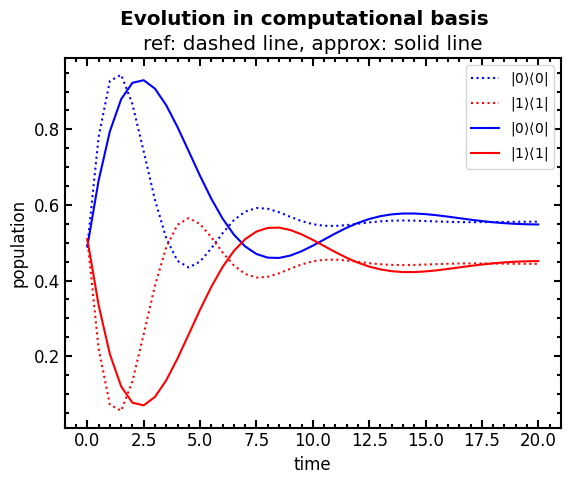

In [105]:

compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=computation_basis_labels(1))

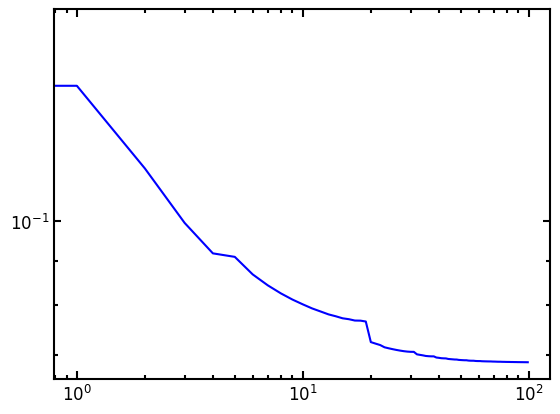

In [65]:
plt.loglog(errors)